#Chapter 1. Multivariate Multimodel Anomaly Detection with Negative Sampling

Colab to accompany [Interpretable, Multidimensional, Multimodal Anomaly Detection
with Negative Sampling for Detection of Device Failure](https://proceedings.icml.cc/static/paper_files/icml/2020/2557-Paper.pdf), Sipple, 2020.

In this library we propose a scalable, unsupervised approach to detecting anomalies in the Internet of Things (IoT). Complex devices are connected daily and eagerly generate vast streams of multidimensional measurements characterizing their momentary state.  

Occasionally, some devices fail, resulting in a system outage, and postmortem analysis reveals that these devices generated unusual states before the outage. Had technical staff been promptly alerted, they could have preemptively fixed the device. It is often impractical or impossible to predict failures on fixed rules or supervised machine learning methods, because failures are too complex, devices are too new to adequately characterize both normal and failure modes in a specific environment, or the environment changes and puts the device into an unpredictable condition. 

Examples of such complex networked devices include power and climate control in commercial buildings, servers and computers in data centers, badge readers and alarms in physical security systems, and electromechanical components in powerplants. In this paper, we explore an approach that automatically observes a complex system, generates a normal, multidimensional baseline, and detects anomalous measurements from the incoming data stream.



---
This is the initial colab that covers Anomaly Detection in multidimensional data in a series of various topics in Anomaly Detection.


##Quickstart
Simply execute the following cell that performs a pip-install of madi from the github repo.




In [ ]:
!pip install git+https://github.com/google/madi.git

##Detecting and Interpreting Anomalies
Consider a target process that generates a sequential stream of multidimensional data points $x(1), x(2),...$, where the $i^{th}$ data point $x(i)$ , is a $D$-dimensional vector $x=\left \{x_{1}, x_{2},...,x_{D}\right \}$ in $\mathbb{R}^{D}$. The target process may be either a single discrete unit, or a homogeneous cohort of equivalent units. Our objectives are to (a) estimate $P(x\in Normal)$, and (b) attribute the anomaly score on to each dimension as an interpretation for each anomalous $x$.


**Definition 1.** An *anomaly* is any data point $x$ with a near zero probability that it was generated by the Normal process: $P(x\in Normal)\approx 0$.

The **Normal** process occupies one or more discrete manifolds or volumes of unknown shape, in $\mathbb{R}^{D}$, which are populated in high density by the target process, except for the small subset of anomalous points that fall outside the Normal volume(s). The **Anomalous** volume is the complement of the Normal volume in $\mathbb{R}^{D}$. A **unimodal process** occupies a single discrete volume, and a **multimodal process** occupies two or more spatially disconnected volumes.

###Detecting Anomalies with Negative Sampling
The Concentration Phenomenon states that there is exponentially more room in higher dimensions than in lower dimensions. Intuitively, as the number of dimensions $D$ increases, the cube has $2^{D}$ corners, so most of the volume is concentrated near them, and manifolds tend to occupy less volume relative to the full space (vanhandel2016, vershynin2018).  Based on the Concentration Phenomenon, we propose a simple method for developing a labeled data set to train a classifier for our anomaly detection task.

Our approach to anomaly detection is to define two class samples, and train a classifier function $F:\mathbb{R}^{D}\rightarrow [0,1]$ to distinguish between the two classes. The **positive class sample** $U=\left \{ u(1), u(2),...,u(M) \right \}$ is the set of $M$ $D$-dimensional data points\footnote{Every $u$ and $v$ are $D$-dimensional points like $x$, and we use letters $u$ and $v$ to distinguish the positive (observed) sample $U$ from the negative sample $V$.} that were observed by the target process, including a small number of unlabeled, actual anomalies, which our anomaly detection algorithm is expected to detect. Because the positive sample is contaminated with a small number of anomalous data points, there is also a false positive labeling error, $P(u\in Anomalous)>0$. However, because anomalies are rare by definition, the probability that any point drawn from the positive sample is normal is nearly one, independent of dimensionality $D$.  The **negative class sample** $V=\left \{ v(1), v(2),...,v(N) \right \}$  is chosen independently and uniformly from the cube bounded by the extrema of each dimension plus some small $\pm\delta$, where the volume bounded by the negative sample is strictly greater than the volume bounded by the positive sample, $Vol(U)<Vol(V)$. The **sample ratio**, $r_{s}=\frac{N}{M}$, governs the ratio between the negative sample size and the positive sample size, where $r_{s}=0$ represents the one-class anomaly detection classifier. Since the negative class is intended to represent the space of anomalies, and there is a nonzero probability that a negative sample point will land within the normal region, $P(v\in Normal)>0$, we also have a false negative labeling error. 

**Assumption 1** (Sufficiency): *The positive sample U is representative of a stationary, ergodic Normal process.* As with all supervised approaches, the training set should reflect the prediction set, and it is essential to sample enough to reflect all Normal modes of behavior. In monitoring climate control devices, it is important to sample from all hours of the day, and days of the week, even when fixing seasonal conditions. 

Ideally, we would like to train a binary classifier $F$ with data that has as few labeling errors as possible. Intuitively, it makes sense to develop an algorithm that carefully selects the negative sample to avoid the Normal space. For example, Gonzalez2002 proposes a type of region-growing approach that avoids choosing points close to the positive sample.  However, such a sampling approach is difficult and/or computationally expensive in high dimensions because we are not able to characterize the positive volume. Instead, we observe that volumes tend to contract in high-dimensional spaces, and propose using uniform i.i.d. sampling for generating the negative sample.


**Proposition 1.** (Uniform Negative Sampling): For each dimension $d \leq D$, let $lim_{d}=\left [ min\left ( U_{d} \right ) -\delta, max\left ( U_{d} \right ) +\delta  \right ]$ be a range bounded by the extrema of the positive sample $U$ extended by a conservative positive length $\delta$ that extends $lim_{d}$ beyond the normal space. We assume that the sample size of $U$ is sufficiently large to bound the Normal region. Choose a negative sample $V$, by selecting $N$ points uniformly i.i.d. bounded by $lim_{d}$ for each $d \leq D$. In high dimension, $ D \rightarrow \infty $, false negative sampling error decays exponentially to zero, regardless of the shape of the Normal region.}

*Proof.* While it can be shown that specific shapes such as the sphere or Gaussian contract to zero volume in high dimensions, we choose the hypercube for the normal volume with lengths bounded by the extrema $\Delta u_{d}=max \left ( U_{d} \right ) - min \left ( U_{d} \right )$ since its relative volume decreases most slowly with increasing dimension. Since we are sampling uniformly, the probability of a false positive is the relative volume $P\left ( v \in Normal \right ) = \frac{Vol(U)}{Vol(V)}$.  The length of dimension $d$ in the negative volume is $\Delta v_{d} = \Delta u_{d} + 2 \delta$ . Since $\Delta u_{d} < \Delta v_{d}$ for all $d \leq D$, as the dimensionality $D$ increases, the false negative error descends exponentially to zero $P \left ( v \in Normal \right ) = \lim_{ D  \rightarrow \infty } \prod_{d}^{D}\frac{\Delta v_{d}}{\Delta u_{d} }=0$ .    

The rate at which $P \left ( v \in Normal \right )$ decreases depends on the geometry and volume of the Normal region. Proposition 1 provides upper-bounded asymptotic guarantees that can be strengthened given knowledge of the geometry of the Normal volume. However, when the characteristics of the Normal region are unknown, without loss of generality, we can use Proposition 1 to bound the false negative probability $P \left ( v \in Normal \right ) \leq \prod_{d}^{D}\frac{\Delta v_{d}}{\Delta u_{d} }$ Next, we apply Proposition 1 to develop a simple procedure for developing a dataset that can be used to train an anomaly detection classifier.


**Proposition 2.** (Labeled Training Set for Anomaly Detection): *Given a sufficiently sampled, high-dimensional dataset from a target process and uniform negative sampling, we can generate a labeled two-class dataset to train a classifier $F$ for detecting anomalies.*

A good training set requires a low number of labeling errors for a classifier to learn decision boundaries. In this application, both false positive and false negative errors are small. By our definition of an anomaly, false negative occurrences are rare and $P \left ( u \in Anomalous \right ) \approx 0$, so $U$ can be used in training data to represent the Normal class. By Proposition 1, uniform negative sampling can be used to generate accurate labeled data representing the anomalous regions, when $ D  \rightarrow \infty$.  

The **sampling ratio**, $r_{s}$, specifies the density of negative data points since the Negative Sample volume is fixed. In lower dimensions, it is possible to oversample in the Negative Sample, such that $P \left ( v \in Normal \right ) \approx P \left ( u \in Normal \right )$ and a classifier is unable to learn decision boundaries. The sample ratio should be chosen within $r_{s,min}:P \left ( u \in Anomalous \right ) \ll P \left ( v \in Anomalous \right )$ and $r_{s,max}:P \left ( v \in Normal \right ) \ll P \left ( u \in Normal \right )$.


Given that the classifiers are universal function approximators, such as deep ReLU networks (Hanin2019), there is no limitation to the number of distinct modes, shapes, or orientations of continuous, high-dimensional Normal volumes. Negative-sampling classifiers detect “bad interactions”, where the values of all dimensions are within Normal ranges, but in aggregate, the points are in the Anomalous region.  

If the positive sample size, the dimensionality, and the classifier hyperparameters (number of estimators, tree depth, number layers, layer width, etc.) are fixed, and we assume that, in general, classifier training time grows linearly with the size of input, then the run-time complexity incurred during training of negative sampling depends on the sampling ratio only, $O(r_{s})$, and remains constant, $O(1)$, at inference.

In [1]:
#@title Colab Imports
import sys
import time
import madi
from madi.utils import file_utils
import numpy as np
import pandas as pd
from typing import Tuple, List, Dict
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib as mpl
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

from madi.datasets import gaussian_mixture_dataset
from madi.datasets import smart_buildings_dataset
from madi.detectors.neg_sample_neural_net_detector import NegativeSamplingNeuralNetworkAD
from madi.detectors.integrated_gradients_interpreter import IntegratedGradientsInterpreter

import tensorflow as tf
assert tf.version.VERSION > '2.1.0'

#1. Select a Dataset

In [2]:
#@title Choose the data set
_RESOURCE_LOCATION = "madi.datasets.data"
data_source = "smart_buildings" #@param ["gaussian_mixture", "smart_buildings"]
ds = None

class InvalidDatasetError(ValueError):
    pass

if data_source == 'gaussian_mixture':
  contamination = 0.15

  ds = gaussian_mixture_dataset.GaussianMixtureDataset(
          n_dim=16,
          n_modes=2,
          n_pts_pos=8000,
          sample_ratio=contamination,
          upper_bound=3,
          lower_bound=-3)
  
  print('Loaded Gaussian mixture with 2 modes in 16 dimensions, with a sample size of %d.' %len(ds.sample))

elif data_source == 'smart_buildings':
    data_file = file_utils.PackageResource(
      _RESOURCE_LOCATION, "anomaly_detection_sample_1577622599.csv")
    readme_file = file_utils.PackageResource(
      _RESOURCE_LOCATION, "anomaly_detection_sample_1577622599_README.md")
    ds = madi.datasets.smart_buildings_dataset.SmartBuildingsDataset(data_file, readme_file)
    print(ds.description)

else:
    raise InvalidDatasetError("You requested an invalid data set (%s)." %data_source)


print('Randomize the data, and split into training and test sample.')
split_ix = int(len(ds.sample) * 0.8)
training_sample = ds.sample.iloc[:split_ix]
test_sample = ds.sample.iloc[split_ix:]
print("\tTraining sample size: %d" %len(training_sample))
print("\tTest sample size: %d" %len(test_sample))

The Smart Buildings Anomaly Detection dataset consists of 60,425
 multidimensional, multimodal observations derived from 15
 Variable Air Volume (VAV) climate control devices collected over 14 days
 between October 8 and October 21, 2019, from a Google campus in the
 California Bay Area. In 1,921 (3.2%) anomalous observations, the devices
 are unable to maintain setpoint, and are of interest to facilities
 technicians. A setpoint is maintained when the zone air temperature
 remains above the zone air heating setpoint, and below the zone air
 cooling setpoint. On Mondays through Fridays, from 6:00 am to 10:00 pm
 local time, the devices operate in a comfort mode, with tight constraints
 between the heating and cooling setpoints. From 10:00 pm to 6:00 am, and
 on weekends the setpoints are wider to reduce energy consumption, and
 hence, there are comfort and eco operating modes. The data had seven
 numeric dimensions: zone air cooling temperature setpoint, zone air
 heating temperature s

#2. Configure Anomaly Detectors


**Negative Sampling Neural Net**

The NS-NN is based on a very basic neural network of a few stackes (usually 1 - 3) of dense (with ReLU activations) and dropout hidden layers. In this architecture, each hidden layer as the same number of nodes. The input layer  has width $D$, and the output layer is a sigmoid. We apply a binary cross-entropy loss and use RMS Prop as the optimizer. 

The training data is a permuted sample of positive (with `class_label`  = 1) and negative data points (with `class_label` = 0). 

*  `sample_ratio`: The size ratio between negative and positive samples, e.g., `sample_ratio` = 2 means that there are twice as many negative sample points as positive.
*  `sample_delta`: The extension behond the range define by the min and max of the positive sample for each dimension, e.g., `sample_delta`  = 0.5 means that the negative samples in a range between 2.5% beyond positive sample min and max.
*  `batch_size`: Training batch size for neural net classifier.
* `steps_per_epoch`: Number of steps per training epoch for neural network.
* `epochs`: total number of epochs in training.
* `dropout`: The dropout fraction for each dropout layer.
* `layer_width`: number of nodes at each layer.
* `n_hidden_layers`: number of hidden layers between input layer and output sigmoid layer.

**Negative Sampling Neural Net**

NS-NN and NS-RF use the same type of negative sampling to build a classifier training set.
*  `sample_ratio`: The size ratio between negative and positive samples, e.g., `sample_ratio` = 2 means that there are twice as many negative sample points as positive.
*  `sample_delta`: The extension behond the range define by the min and max of the positive sample for each dimension, e.g., `sample_delta`  = 0.5 means that the negative samples in a range between 2.5% beyond positive sample min and max.
*  Additional parameters for Random Forest Classifiers are avilable at [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

**Isolation Forest**

Please see [sklearn.ensemble.IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) for detailed explanation of the parameters.

**One-Class SVM**

Please see [sklearn.svm.OneClassSVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html) for a detailed explanantion of the parameters.



In [3]:
#@title Reset Anomlay Detectors
ad_dict = {}
log_dir = "logs/nsnn2" #@param {type:"string"}

# Set up the logging directory.
!mkdir -p $log_dir

# Neg Sampling Neural Net Parameters
nsnn_params = {}


if data_source == 'gaussian_mixture':

    nsnn_params['sample_ratio']=10.0
    nsnn_params['sample_delta']=0.05
    nsnn_params['batch_size']=16
    nsnn_params['steps_per_epoch']=80
    nsnn_params['epochs']=180
    nsnn_params['dropout']=0.7
    nsnn_params['layer_width']=145
    nsnn_params['n_hidden_layers']=3

elif data_source == 'smart_buildings':

    nsnn_params['sample_ratio']=25.0
    nsnn_params['sample_delta']=0.05
    nsnn_params['batch_size']=32
    nsnn_params['steps_per_epoch']=16
    nsnn_params['epochs']=100
    nsnn_params['dropout']=0.85
    nsnn_params['layer_width']=150
    nsnn_params['n_hidden_layers']=2

else:
  raise InvalidDatasetError("You requested an invalid data set (%s)." %data_source)

The syntax of the command is incorrect.


In [5]:
#@title Add in Negative Sampling Neural Net (ns-nn)
ad_dict['ns-nn'] = NegativeSamplingNeuralNetworkAD(
        sample_ratio=nsnn_params['sample_ratio'],
        sample_delta=nsnn_params['sample_delta'],
        batch_size=nsnn_params['batch_size'],
        steps_per_epoch=nsnn_params['steps_per_epoch'],
        epochs=nsnn_params['epochs'],
        dropout=nsnn_params['dropout'],
        layer_width=nsnn_params['layer_width'],
        n_hidden_layers=nsnn_params['n_hidden_layers'],
        log_dir=log_dir)

print('Anomaly Detectors: ', list(ad_dict))

Anomaly Detectors:  ['ns-nn']


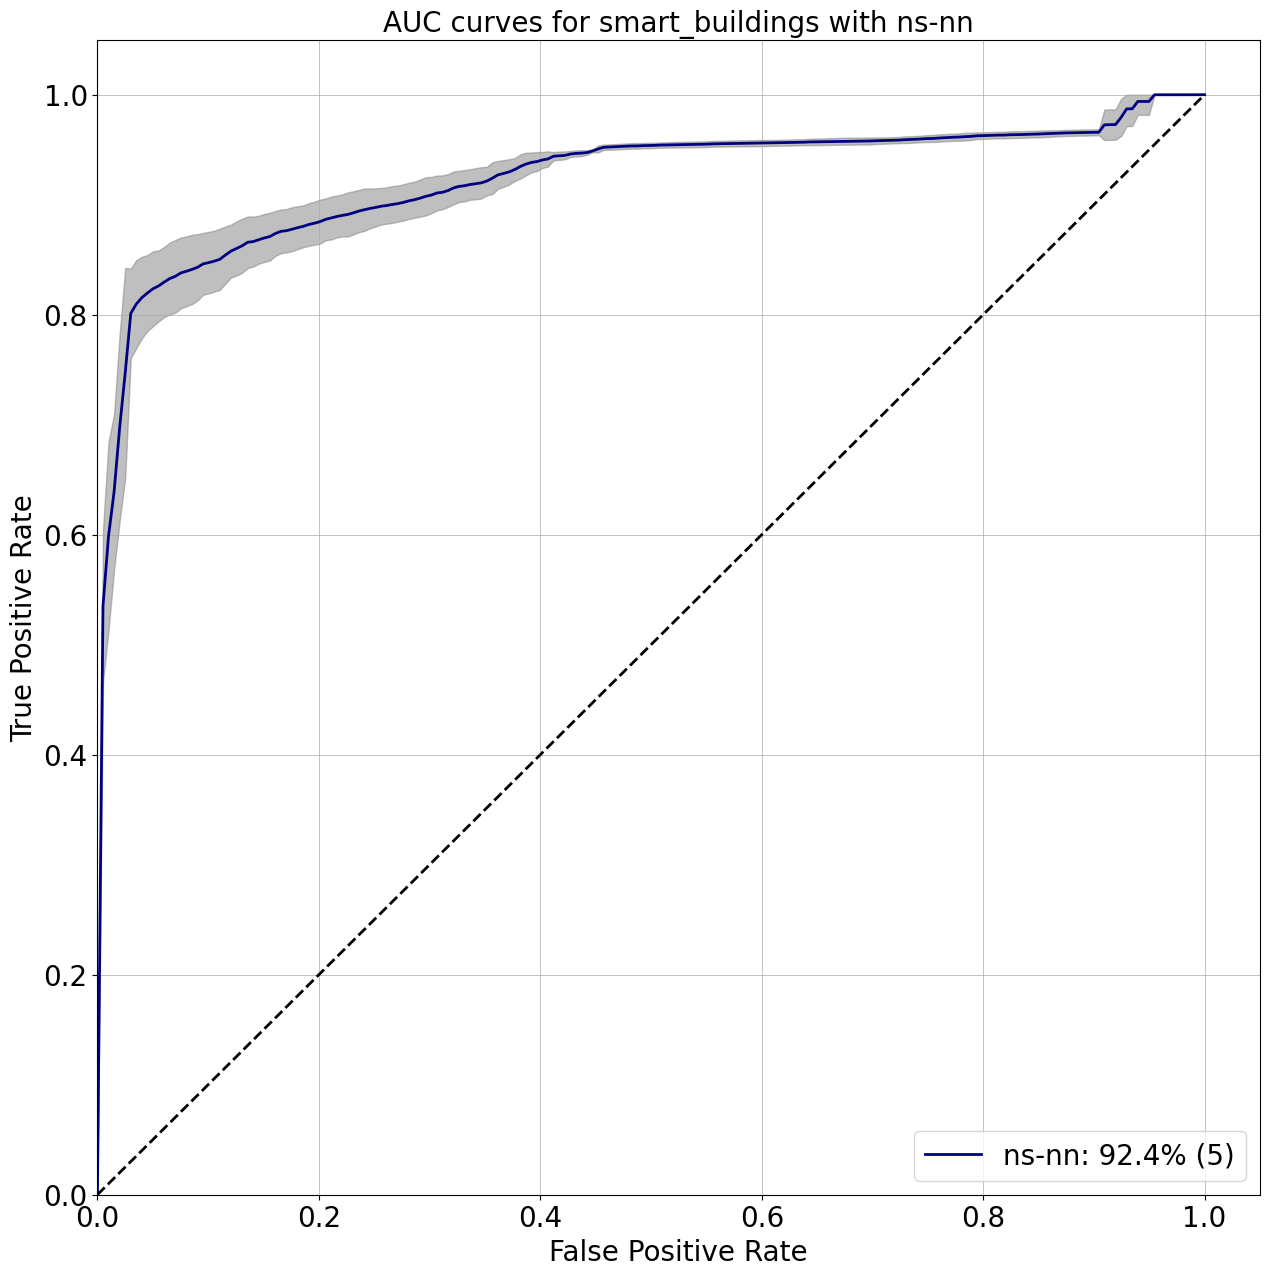

Final Results:
                 ad       auc    extime
000-00-ns-nn  ns-nn  0.937379  6.783037
000-01-ns-nn  ns-nn  0.911564  6.272090
000-02-ns-nn  ns-nn  0.912614  5.948946
000-03-ns-nn  ns-nn  0.930404  6.122639
000-04-ns-nn  ns-nn  0.926359  5.845578


In [6]:
#@title Execute Cross-Fold Validation {output-height:"unlimited"}
number_crossfolds =  1#@param {type:"integer"}
number_folds =  5#@param {type:"integer"}


def fold_sample(sample: pd.DataFrame, n_folds: int = 5) ->  List[Dict[str, pd.DataFrame]]:
  """Splits a sample into N folds.
  
  Args:
    sample: training/test sample to be folded.
  """
  sample = shuffle(sample)
  
  folds = []
  # Split into train and test folds, and assign to list called folds.
  for training_sample_idx, test_sample_idx in KFold(n_splits=5).split(sample):
    test_sample = sample.iloc[test_sample_idx]
    training_sample = sample.iloc[training_sample_idx]
    folds.append({"train": training_sample, "test": test_sample})
  return folds


def plot_auc(ad_results: Dict[str, Dict[str, Dict[str, np.array]]], 
             experiment_name: str):
  """Plots the ROC AUC. """
  
  fig, ax = plt.subplots(figsize=(15, 15))
  start = 0.0
  stop = 1.0
  colors = [cm.jet(x) for x in np.linspace(start, stop, len(ad_results))]

  df_auc = pd.DataFrame()

  lw = 2
  ix = 0
  for ad_id in ad_results:

    fold_results = ad_results[ad_id]
    vfprs = []
    vtprs = []

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 200)
    validation_aucs = []
    for fold_id in fold_results:
      fpr = fold_results[fold_id]['fpr']
      tpr = fold_results[fold_id]['tpr']

      validation_auc_val = auc(fpr, tpr)
      validation_aucs.append(validation_auc_val)    
      interp_tpr = np.interp(mean_fpr, fpr, tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)

    mean_tpr = np.mean(tprs, axis=0)
  
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(validation_aucs)
    df_auc[ad_id] = [mean_auc]

    plt.plot(mean_fpr, mean_tpr, color=colors[ix], lw=lw, 
             label='%s: %0.1f%% (%d)' % (
                 ad_id, 100.0 * mean_auc, len(fold_results) ))
    ix+=1

    std_tpr = np.std(tprs, axis=0)
    
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='gray', alpha=0.5,
                label=None)
    
  ax.grid(linestyle='-', linewidth='0.5', color='darkgray')
  plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.05])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('AUC curves for %s' %experiment_name)
  
  legend = plt.legend(loc='lower right', shadow=False, fontsize='20')
  legend.get_frame().set_facecolor('white')

  for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
  
  for sp in ax.spines:
    ax.spines[sp].set_color("black")

  plt.show()

anomaly_detectors = sorted(list(ad_dict))
experiment_name = "%s with %s" %(ds.name, ", ".join(anomaly_detectors))

df_results = pd.DataFrame(columns = ['ad', 'auc', 'extime'])
ad_results = {}

for ad in anomaly_detectors:

  if ad not in ad_results:
    ad_results[ad] = {}

  for cx_run in range(number_crossfolds):
    folds = fold_sample(ds.sample, n_folds = number_folds)

    for fid in range(number_folds):
      
      fold = folds[fid]

      # Drop the class label from the training sample, since this is unsupervised.
      training_sample = fold['train'].copy()
      testing_sample = fold['test'].copy()
      X_train = training_sample.drop(columns = ['class_label'])
      X_test  = testing_sample.drop(columns = ['class_label'])
      y_test  = testing_sample['class_label']

      start_time = time.time()

      # Train a model in the training split.
      ad_dict[ad].train_model(x_train=X_train)

      # Predict on the test set.
      y_predicted = ad_dict[ad].predict(X_test)['class_prob']

      # Compute the AUC on the test set. 
      auc_value = madi.utils.evaluation_utils.compute_auc(
              y_actual=y_test, y_predicted=y_predicted)
        
      # Compute the ROC curve.
      fpr, tpr, _ = roc_curve(y_test, y_predicted)

      end_time = time.time()
      extime = end_time - start_time
      ad_results[ad]['%03d-%02d' %(cx_run, fid)] = {'fpr': fpr, 'tpr':tpr}
      df_results.loc['%03d-%02d-%s' %(cx_run, fid, ad)] = [ad, auc_value, extime]

      # Refresh the output area.
      clear_output()
      
      plot_auc(ad_results, experiment_name  = experiment_name)
      
      del training_sample
      del testing_sample
print("Final Results:")
print(df_results)


##Next steps
In the next chapter, we’ll explore variable attribution using Integrated Gradients. This provides some interpretability by blaming the dimensions that have the greatest effect on the anomaly score.